In [1]:
#libration_frequency.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 March 2018.
#plot phase-space diagrams for ringlets librating about their fixed point

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

reading output in folder =  narrow_ring/ring_mass_1.5e-11/output
reading output in folder =  narrow_ring/ring_mass_2.4e-11/output
reading output in folder =  narrow_ring/ring_mass_3.7e-11/output
reading output in folder =  narrow_ring/ring_mass_6.5e-11/output
reading output in folder =  narrow_ring/ring_mass_1.3e-10/output
reading output in folder =  narrow_ring/ring_mass_2.5e-10/output
reading output in folder =  narrow_ring/ring_mass_5.0e-10/output
reading output in folder =  narrow_ring/ring_mass_1.0e-9/output
reading output in folder =  narrow_ring/ring_mass_2.0e-9/output
reading output in folder =  wide_ring/ring_mass_1.0e-10/output
reading output in folder =  wide_ring/ring_mass_2.0e-10/output
reading output in folder =  wide_ring/ring_mass_3.3e-10/output
reading output in folder =  wide_ring/ring_mass_5.0e-10/output
reading output in folder =  wide_ring/ring_mass_7.0e-10/output
reading output in folder =  wide_ring/ring_mass_1.0e-9/output
reading output in folder =  wide_ring/ri

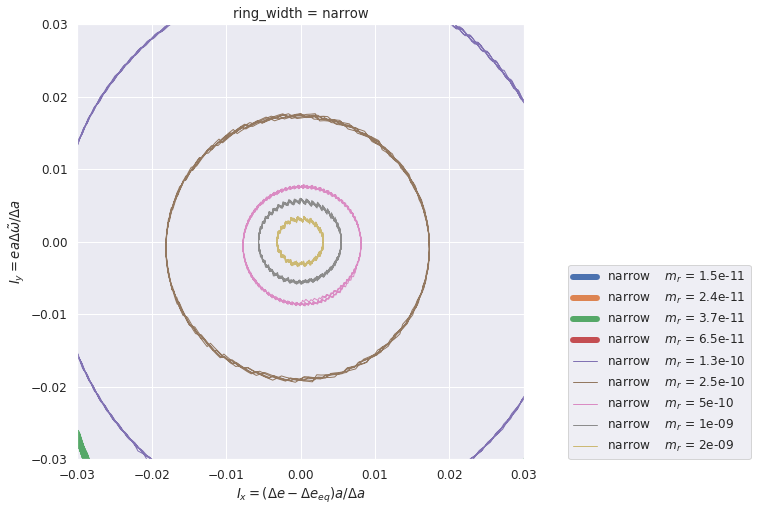

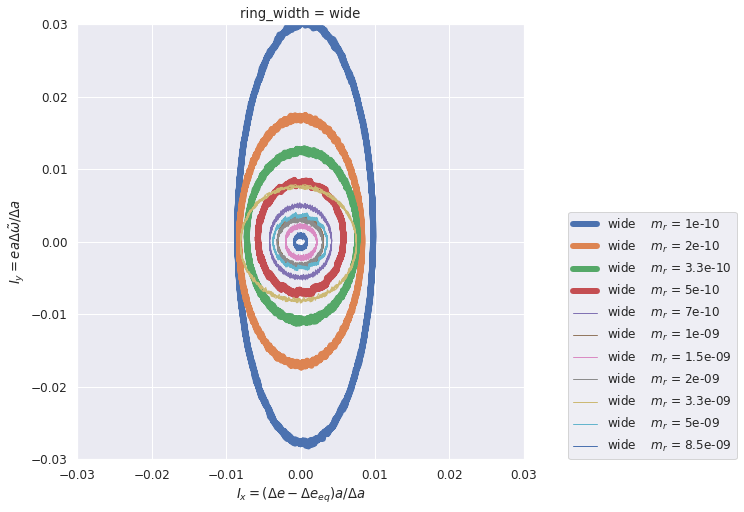

In [16]:
#restore output
parent_folders = [
    'narrow_ring/ring_mass_1.5e-11/', 'narrow_ring/ring_mass_2.4e-11/', 'narrow_ring/ring_mass_3.7e-11/', 
    'narrow_ring/ring_mass_6.5e-11/', 'narrow_ring/ring_mass_1.3e-10/', 'narrow_ring/ring_mass_2.5e-10/', 
    'narrow_ring/ring_mass_5.0e-10/', 'narrow_ring/ring_mass_1.0e-9/', 'narrow_ring/ring_mass_2.0e-9/', 
    'wide_ring/ring_mass_1.0e-10/', 'wide_ring/ring_mass_2.0e-10/', 'wide_ring/ring_mass_3.3e-10/', 
    'wide_ring/ring_mass_5.0e-10/', 'wide_ring/ring_mass_7.0e-10/', 'wide_ring/ring_mass_1.0e-9/', 
    'wide_ring/ring_mass_1.5e-9/', 'wide_ring/ring_mass_2.0e-9/', 'wide_ring/ring_mass_3.3e-9/', 
    'wide_ring/ring_mass_5.0e-9/', 'wide_ring/ring_mass_8.5e-9/']
data = []
from helper_fns import *
from libration import *
sns.set(font_scale=1.5, font='DejaVu Sans')
sns.set(font_scale=1.1, font='DejaVu Sans')
f_narrow, ax_narrow = plt.subplots(figsize=(8, 8))
f_wide, ax_wide = plt.subplots(figsize=(8, 8))
for idx, parent_folder in enumerate(parent_folders):
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    d = {'parent_folder':parent_folder, 'radial_width':radial_width, 'total_ring_mass':total_ring_mass, 
        'Rp':Rp, 'J2':J2} 
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    d['ring_width'] = 'narrow'
    if ('wide' in parent_folder):
        d['ring_width'] = 'wide'
    d['a'] = a_mean.mean()
    d['e'] = e_mean.mean()
    d['da'] = da.mean()
    d['de_eq'] = de.mean()
    d['dwt_eq'] = dwt.mean()
    d['q'] = q.mean()
    d['H'] = H.mean()
    d['e_prime'] = e_prime.mean()
    d['wt_prime'] = wt_prime.mean()
    #BGT libration frequency
    GM = 1.0
    M_central = 1.0
    a3 = d['a']**3
    a_over_da = d['a']/d['da']
    n = np.sqrt(GM/a3)
    omega_bgt = (d['total_ring_mass']/M_central)*(a_over_da**2)*n*d['H']/np.pi
    d['omega_bgt']  = omega_bgt    
    d['T_lib_bgt'] = 2.0*np.pi/d['omega_bgt']
    #compute libration phase & frequency
    Ix = (de - d['de_eq'] )*d['a']/d['da']
    Iy = d['e']*d['a']*(dwt - d['dwt_eq'])/d['da']
    I = np.sqrt(Ix**2 + Iy**2)
    d['I'] = I.mean()
    d['Delta_I_over_I'] = (I.max() - I.min())/d['I']
    d['Delta_q_over_q'] = (q.max() - q.min())/d['q']
    d['Delta_H_over_H'] = (H.max() - H.min())/d['H']
    d['Iy_over_Ix'] = Iy.max()/Ix.max()
    phase = np.arctan2(Iy, Ix)
    phase_unwrapped = unwrap_angle(phase)
    coeff = np.polyfit(times, phase_unwrapped, 1)
    phase_fit = coeff[1] + coeff[0]*times
    omega = coeff[0]
    d['omega'] = omega
    d['T_lib'] = 2.0*np.pi/d['omega']
    data += [d]
    #plot
    x = Ix
    y = Iy
    label = d['ring_width'] + r'    $m_r$ = ' + str(d['total_ring_mass'])
    ax = ax_narrow
    if (d['ring_width'] == 'wide'):
        ax = ax_wide
    linewidth = 1
    if (d['T_lib'] < 0.8*d['T_lib_bgt']):
        linewidth = 6
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=label)
    p = ax.set_title('ring_width = ' + d['ring_width'])
    p = ax.set_xlabel(r'$I_x = (\Delta e - \Delta e_{eq})a/\Delta a$')
    p = ax.set_ylabel(r'$I_y = ea\Delta\tilde{\omega}/\Delta a$')
    p = ax.set_xlim(-0.03, 0.03)
    p = ax.set_ylim(-0.03, 0.03)
    p = ax.legend(loc=(1.1, 0))
df = pd.DataFrame(data)

In [17]:
df.tail()

,Delta_H_over_H,Delta_I_over_I,Delta_q_over_q,H,I,Iy_over_Ix,J2,Rp,T_lib,T_lib_bgt,...,e,e_prime,omega,omega_bgt,parent_folder,q,radial_width,ring_width,total_ring_mass,wt_prime
15,0.001453,0.454675,0.019184,0.518844,0.002150,1.160794,0.01,0.5,24205.000268,25382.748333,...,0.005,0.219597,0.000260,0.000248,wide_ring/ring_mass_1.5e-9/,0.219602,0.001,wide,1.500000e-09,0.000074
16,0.001468,0.384567,0.038808,0.509446,0.003077,1.150970,0.01,0.5,18876.885983,19394.608985,...,0.005,0.157039,0.000333,0.000324,wide_ring/ring_mass_2.0e-9/,0.157055,0.001,wide,2.000000e-09,0.000124
17,0.001858,0.175785,0.196324,0.502392,0.007806,1.049871,0.01,0.5,11797.616794,11930.250812,...,0.005,0.079259,0.000533,0.000527,wide_ring/ring_mass_3.3e-9/,0.079454,0.001,wide,3.300000e-09,0.000282
18,0.000404,0.255192,0.194651,0.500523,0.003627,1.133126,0.01,0.5,7849.984665,7911.284574,...,0.005,0.037145,0.000800,0.000794,wide_ring/ring_mass_5.0e-9/,0.037233,0.001,wide,5.000000e-09,0.000022
19,0.000009,1.121573,0.505827,0.500005,0.000868,1.491624,0.01,0.5,4629.686365,4668.676732,...,0.005,0.003383,0.001357,0.001346,wide_ring/ring_mass_8.5e-9/,0.003444,0.001,wide,8.500000e-09,0.000045


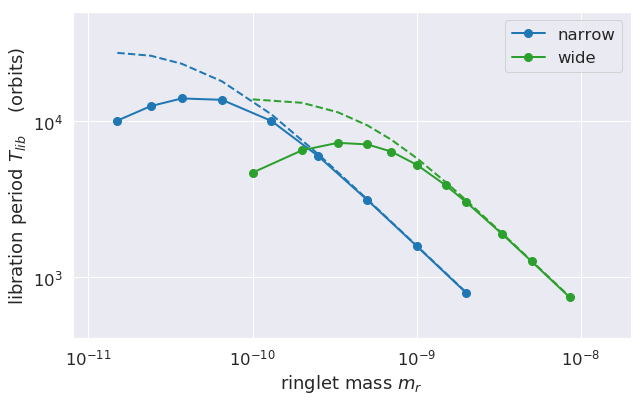

In [18]:
#plot T_lib vs total_ring_masses
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
ring_widths = df.ring_width.unique()
for idx, ring_width in enumerate(ring_widths):
    jdx = (df.ring_width == ring_width)
    dfs = df[jdx]
    x = dfs.total_ring_mass
    y = dfs.T_lib/(2*np.pi)
    color = color_seq[idx]
    if (idx ==1):
        color = color_seq[idx + 1]
    p = ax.plot(x, y, marker='o', markersize=8, linestyle='-', linewidth=2, label=ring_width, color=color)
    y = dfs.T_lib_bgt/(2*np.pi)
    p = ax.plot(x, y, linestyle='dashed', linewidth=2, label='', color=color)
p = ax.set_xlabel(r'ringlet mass $m_r$')
p = ax.set_ylabel(r'libration period $T_{lib}$    (orbits)')
p = ax.set_xlim(8.0e-12, 2.0e-8)
p = ax.set_ylim(4.0e2, 5.0e4)
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = plt.legend()
plt.savefig('figs/libration.pdf', bbox_inches='tight')

In [21]:
idx = df.ring_width == 'wide'
dfs = df[idx]
cols = ['total_ring_mass', 'Iy_over_Ix', 'Delta_I_over_I', 'I', 'q', 'H', 'e_prime', 'Delta_q_over_q']
dfs.sort_values('Iy_over_Ix', ascending=False)[cols]

,total_ring_mass,Iy_over_Ix,Delta_I_over_I,I,q,H,e_prime,Delta_q_over_q
9,1.000000e-10,3.129882,1.081308,0.020365,0.943540,2.282090,0.943316,0.019515
10,2.000000e-10,2.109479,0.702399,0.013086,0.840987,1.200162,0.840900,0.019847
11,3.300000e-10,1.689081,0.591216,0.009686,0.711838,0.836522,0.711789,0.021008
19,8.500000e-09,1.491624,1.121573,0.000868,0.003444,0.500005,0.003383,0.505827
12,5.000000e-10,1.478686,0.434086,0.006680,0.573650,0.671161,0.573625,0.020154
13,7.000000e-10,1.292859,0.279583,0.004577,0.453388,0.593216,0.453374,0.018493
14,1.000000e-09,1.223739,0.276725,0.003222,0.333162,0.545892,0.333153,0.018466
15,1.500000e-09,1.160794,0.454675,0.002150,0.219602,0.518844,0.219597,0.019184
16,2.000000e-09,1.150970,0.384567,0.003077,0.157055,0.509446,0.157039,0.038808
18,5.000000e-09,1.133126,0.255192,0.003627,0.037233,0.500523,0.037145,0.194651
